# AIM

To determine the major factors that affect the life expectancy in the world based on our data and also to train an algorithm that predicts the life epectancy of various countries.

---------------
## About the Data

The main data used for this analysis was gotten from [kaggle](https://www.kaggle.com/kumarajarshi/life-expectancy-who).

In [3]:
# Importing useful libraries that will be needed for this analysis

import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
import IPython
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport


%matplotlib inline

Reading in the datas as pandas dataframe

In [4]:
# 'continent' contains data to be used to map each country to their various continents
continent = pd.read_csv('Data/countryContinent.csv', skipinitialspace=True, encoding = "ISO-8859-1")

# df is the main data downloaded from kaggle and said to be from the WHO
df = pd.read_csv('Data/Life Expectancy Data.csv', parse_dates=True)

In [5]:
#checking the unique continents identified in this secondary data
continent['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'Americas', nan],
      dtype=object)

In [6]:
continent_dict = {} #Creating an empty dict for easy mapping

# a for loop to fill up the empty dictionary with countries and their respective continent for easy mapping
for i in continent['country']:
    cont = continent[continent['country']==i]['continent']
    c = cont.values[0]
    continent_dict[i] = c

In [7]:
#Updating the continent dictionary as it was noticed that some country names didnt match 

update = {'Republic of Korea' : 'Asia', 'Republic of Moldova' : 'Europe' ,
          'Democratic Republic of the Congo' : 'Africa', 'Czechia' : 'Europe', 
          'United Republic of Tanzania' : 'Africa', 'The former Yugoslav republic of Macedonia' : 'Europe', 
          'Democratic Peoples Republic of Korea' : 'Asia'}

continent_dict.update(update)

In [8]:
#adding an extra column named continent to our data, 'df'
df['continent'] = df['Country'].copy()
df['continent'] = df['continent'].replace(continent_dict)
print(df['continent'].value_counts())

Africa                                   864
Asia                                     736
Europe                                   626
Americas                                 530
Oceania                                  166
Democratic People's Republic of Korea     16
Name: continent, dtype: int64


In [9]:
# Repairing the columns names, mainly removing the spaces in between and at the end of the column names

print(f'old column names \n {df.columns} \n\n')

new_columns= []
columns = list(df.columns)
for col in list(df.columns):
    a = col.split()
    b = '_'.join(a)
    new_columns.append(b)
df.columns =new_columns

print(f'new column names \n {df.columns}')

old column names 
 Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'continent'],
      dtype='object') 


new column names 
 Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling',
       'continent'],
      dtype='object')


# EDA

I will be looking at the data statistically, numerically, eyeballing and graphically. I will be doing this in two ways

- Easy way and short way (using pandas profiling)
- Hard way (using pandas, matplotlib and numpy)

### The Easy way

A whole lot of information is being given in the widget being displayed above from basic viewing of the data to knowing the number of missing data to knowing the spread and skewness and to the correlation between various columns and many many more.

### The Hard way

In [10]:
# looking at the first few data in the dataset

df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,continent
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia


In [11]:
# Checking the information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

In [12]:
#Checking the statistical information of the numerical columns in the data

df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


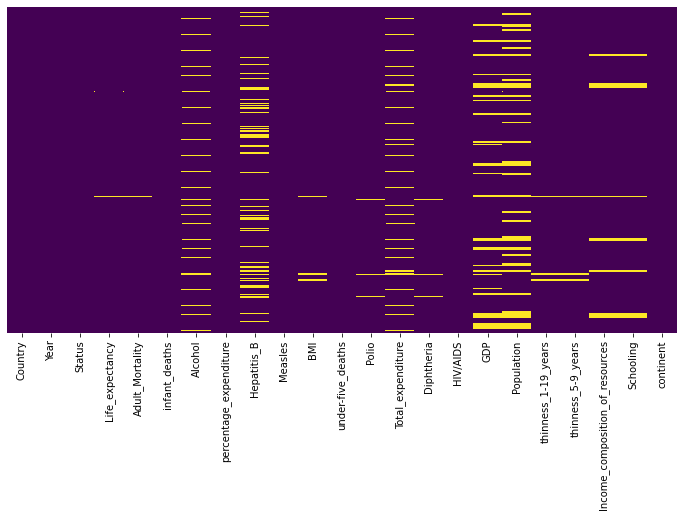

In [13]:
#Cheching the distribution of missing value in the data, where hite spaces denote missing value

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

Please note that a yellow dash is used to signify a missing entry in the data and a fat yellow dash looking more like a rectangle simply means that we have consecutive missing data in that column

### OOPS!!!

Even our target column (Life_expectancy) has missing values, we need to look into this in the subsequent cells

In [14]:
df[df['Life_expectancy'].isnull()]
#df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,continent
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN,Oceania
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7,Americas
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0,Oceania
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,Europe
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6,Oceania
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN,Oceania
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2,Oceania
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4,Americas
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1,Europe
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0,Oceania


These countries don't look very familiar, let's check how many times these countries appeared in the dataset.

In [15]:
df.Country.value_counts().tail(15)

Gabon                    16
Gambia                   16
Georgia                  16
Germany                  16
Ghana                    16
Tuvalu                    1
Cook Islands              1
Marshall Islands          1
Monaco                    1
Palau                     1
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, dtype: int64

##### They appeared only ones, pheeeew! 

Well it is safe to drop them. We will be dropping them after dealing with the other missing data using interpolation.

In [16]:
#creating a list of the column that contain numerical(float64 or int64) data
num_col = list(df.select_dtypes(include=['int64', 'float64']).columns)

#Exempting 'Life_expectancy' and 'Adult_mortality' from the list as I already know what is wrong with it
num_col.remove('Life_expectancy')
num_col.remove('Adult_Mortality')
num_col.remove('Year')

# Applying the builtin pandas interpolate function to fill in the missing data using linear method
for country in df.Country.unique().tolist():
    df.loc[df['Country'] == country,num_col] = df.loc[df['Country'] == country,num_col].interpolate(axis=1)

In [17]:
#shape before dropping missing columns
df.shape

(2938, 23)

In [18]:
# Dropping the missing entries due to Life_expectancy and Adult mortality
df.dropna(inplace=True)

# reseting index and dropping the former index instead of making it a column
df = df.reset_index(drop = True)

In [19]:
#shape after dropping
df.shape

(2928, 23)

In [20]:
# Converting columns to categorical

df[['Country', 'Status']]=df[['Country', 'Status']].astype('category')

# Graphical Exploratory Data Analysis

In [21]:
#Creating a function that check the correlation between indicators for continents

def heatmap_cont(data, continent):
    '''Takes in two argument, a continent and data
    
    Note: Continent must be in the data passed into the function'''
    a = data['continent'].value_counts()
    b = list(a.index)
    assert continent in b, 'cotinent not found in dataset'
    correlation = df[df['continent']==continent].corr()*100
    plt.figure(figsize=(10,7))
    sns.heatmap(correlation, annot = True, cbar=False, cmap = 'viridis')
    plt.title(f'Correlation of indicators for {continent}', fontsize=30)

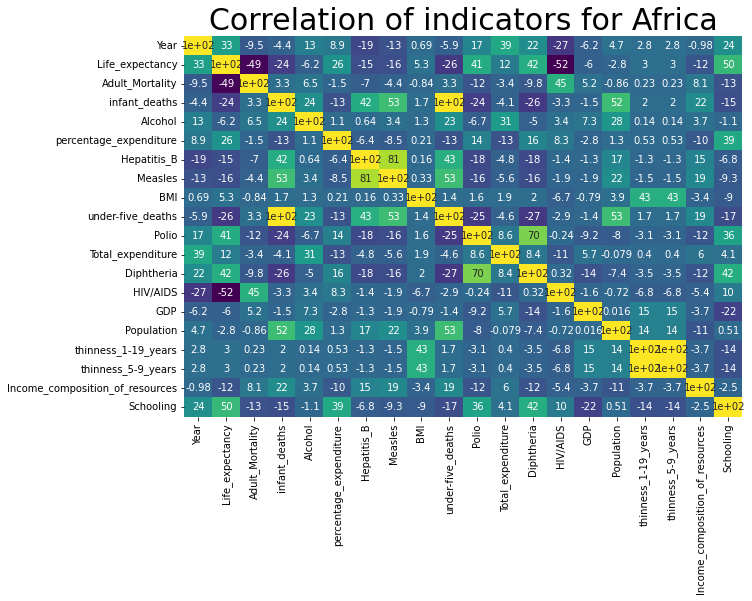

In [22]:
heatmap_cont(df, 'Africa')

In [23]:
#Creating a function that check the correlation between

def heatmap_country(data, country):
    '''Takes in two argument, a country and data'''
    a = data['Country'].value_counts()
    b = list(a.index)
    assert country in b, 'country not found in dataset'
    correlation = df[df['Country']==country].corr()*100
    plt.figure(figsize=(12,7))
    sns.heatmap(correlation, annot = True, cbar=False, cmap = 'viridis')
    plt.title(f'Correlation of indicators for {country}', fontsize=30)

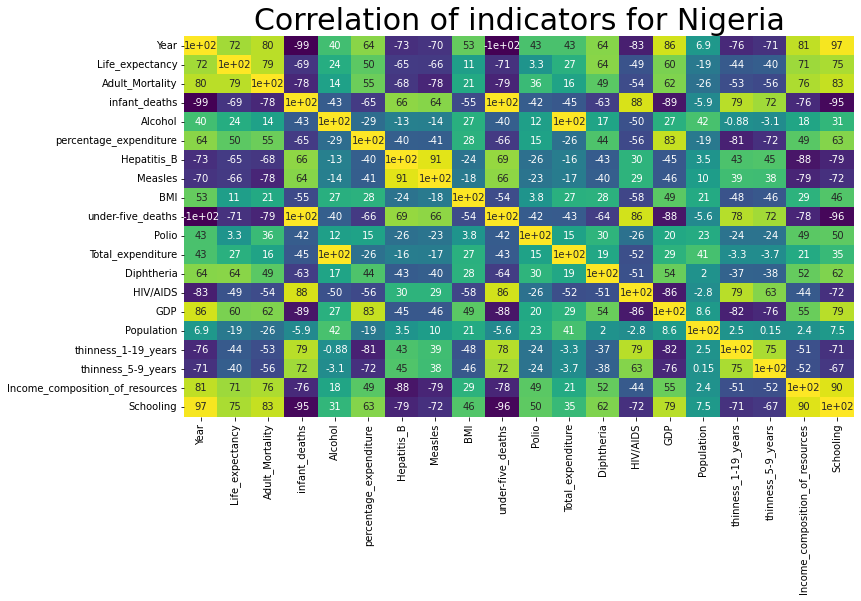

In [24]:
heatmap_country(df, 'Nigeria')

----------------

In [25]:
def plot(data, col, x_val, y_val, specific, save=False, save_name=None):
    '''Take in 5 argument
    data : dataframe containing the data
    col : categorical column in the dataset
    x_val : the value to be on the x axis of the plot
    y_val : the value to be on the y axis of the plot
    specific :  the category in the categorical column to be specialized on
    save(optional) : Boolean, determines if the plot should be saved to file or not
    save_name(depend on save) : if save is True, then save_name must be entered'''
    plt.grid(True)
    df = data[data[col] == specific]
    x = df[x_val]
    y = df[y_val]
    plt.plot(x, y, linestyle = '--')
    plt.scatter(x, y, c='r', marker='x')
    plt.xlabel(x_val)
    plt.ylabel(y_val)
    plt.title(f'{x_val} against {y_val} ({specific})', fontsize=20)
    if save:
        plt.savefig(save_name)   
    plt.show()

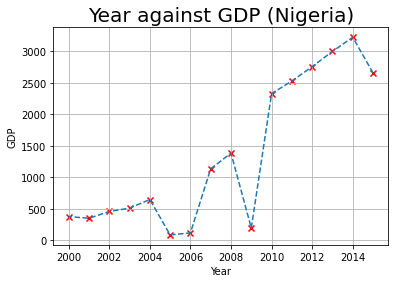

In [26]:
plot(df,'Country', 'Year', 'GDP','Nigeria')#, save=True, save_name='ife')

-----------------
-----------------

In [27]:
# A function for Visualizing the average life expectancy by continent per year
def feature_cpy(year, feature, style=None):
    global df
    plt.figure(figsize=(8,6))
    a = df.groupby(['Year','continent']).mean()
    y = a.loc[year][feature]
    x = a.loc[year].index
    if style == None:
        sns.set_style('darkgrid')
    else:
        sns.set_style(style)
    sns.barplot(x, y)
    plt.title(f'A plot of average {feature} in {year} per continent', fontsize=30)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


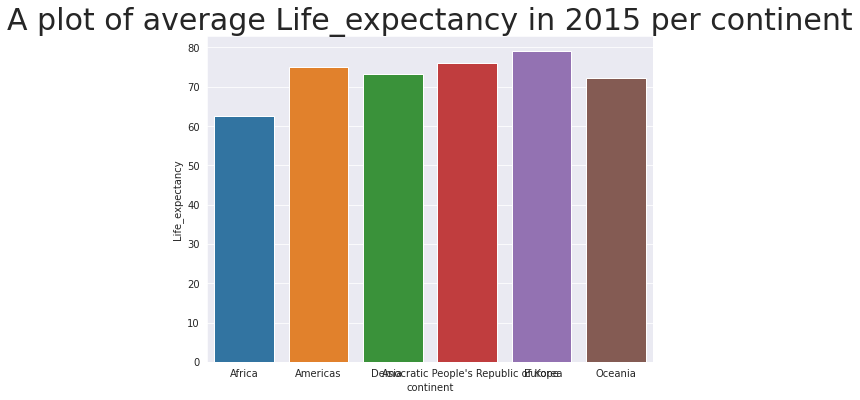

In [28]:
feature_cpy(2015, 'Life_expectancy')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


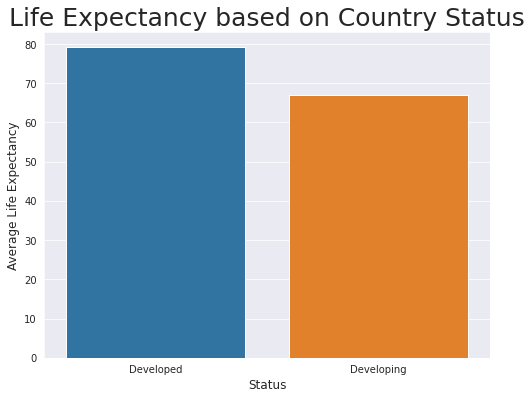

In [29]:
# Visualizing the average life expectancy by ccountry status
plt.figure(figsize=(8,6))
sns.barplot(df.groupby('Status')['Status'].count().index,
        df.groupby('Status')['Life_expectancy'].mean())
plt.xlabel('Status',fontsize=12)
plt.ylabel('Average Life Expectancy',fontsize=12)
plt.title('Life Expectancy based on Country Status', fontsize = 25)
plt.show()

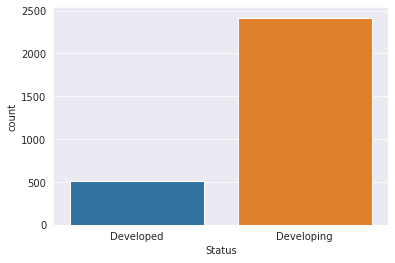

In [30]:
sns.countplot(x='Status', data=df)

We have a bias in the Status column as we have more Developing countries than Developed countrties

## Outliers
**Detecting and Dealing with Outliers**

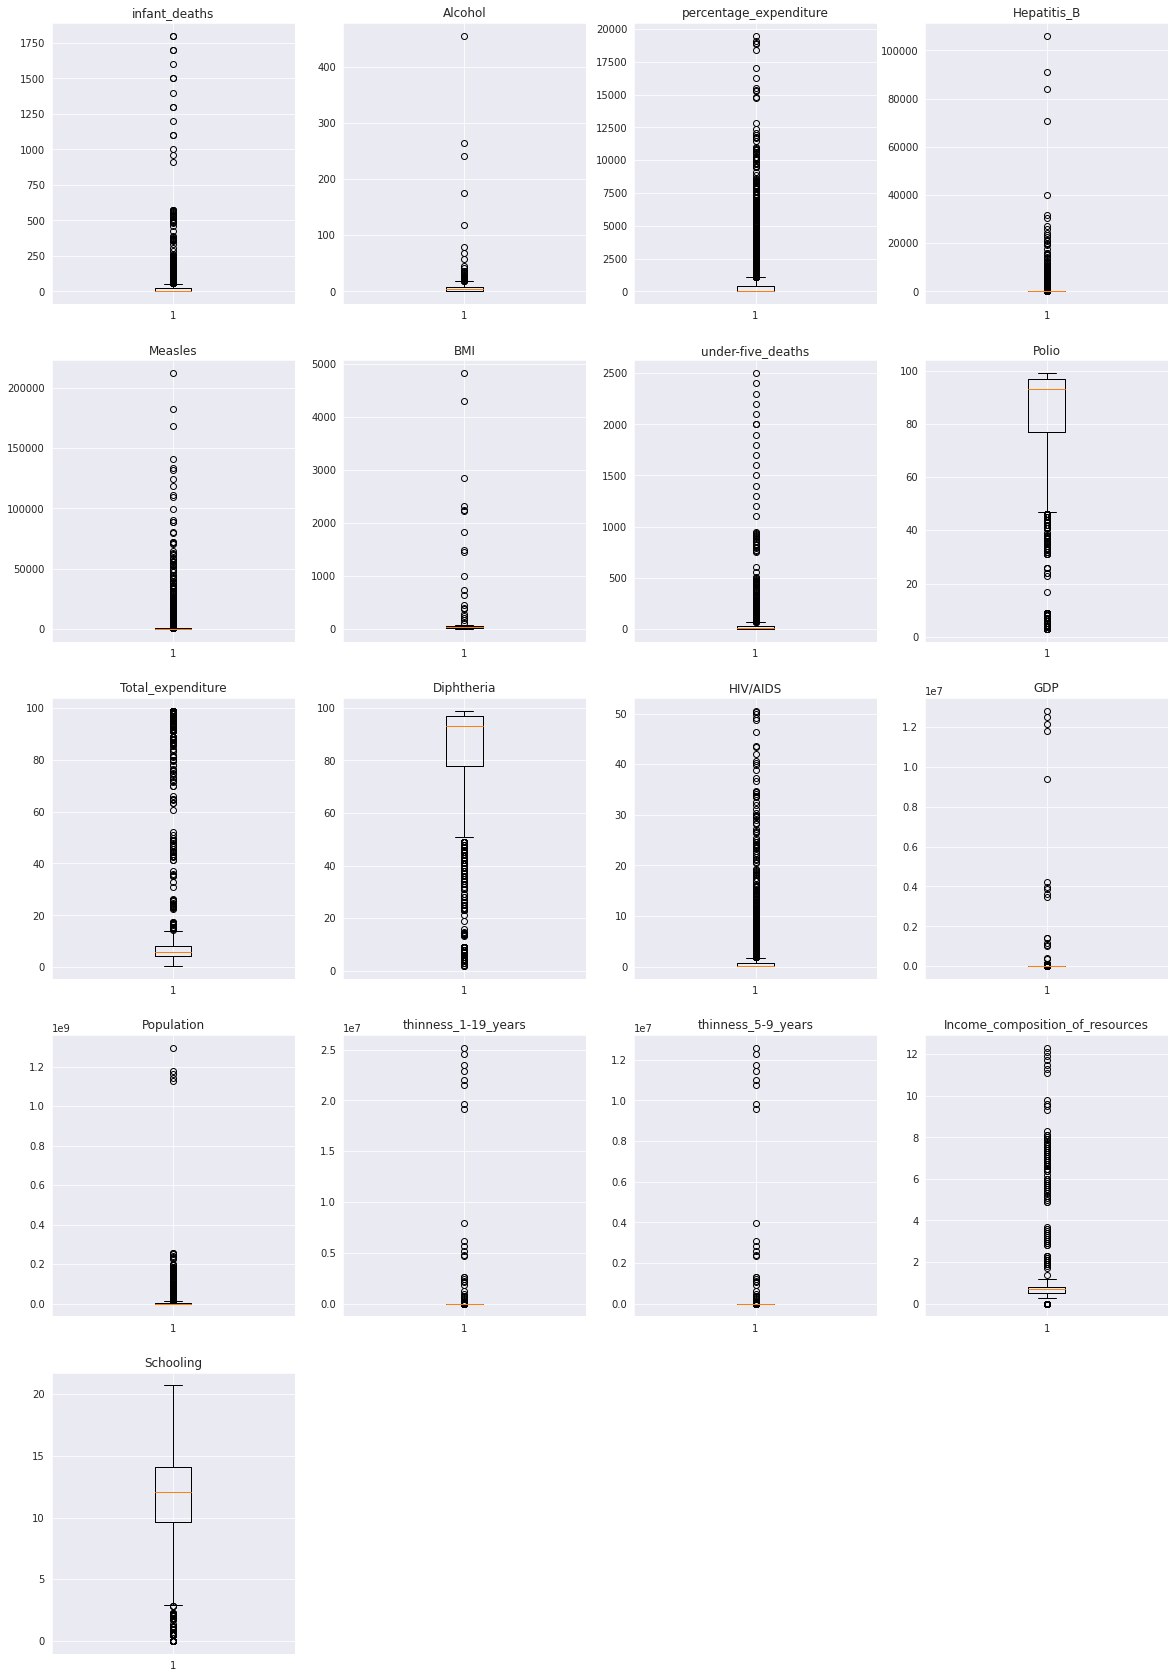

In [31]:
# Create a dictionary of columns.
num_col
col_dict = {}
for index, col in enumerate(num_col):
    col_dict[col] = index+1

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable])
                     plt.title(variable)

plt.show()

In [32]:
# Calculate number of outliers and its percentage in each col using Tukey's method.
upper = {}
lower = {}
for col in col_dict.keys():
    q75, q25 = np.percentile(df[col], [75 ,25])
    iqr = q75 - q25
    
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    num_of_outliers = len((np.where((df[col] > max_val) | (df[col] < min_val))[0]))
    perc_outlier = round(num_of_outliers*100/2928,2)
    
    up = len(np.where(df[col] > max_val)[0])
    low = len(np.where(df[col] < min_val)[0])
    
    if up > low:
        upper[col] = round((perc_outlier+1)/100,2)
    else:
        lower[col] = round((perc_outlier+1)/100,2)
    
    print(f'The number and percentage of Outliers in {col} : {num_of_outliers} and {perc_outlier}%')

The number and percentage of Outliers in infant_deaths : 315 and 10.76%
The number and percentage of Outliers in Alcohol : 32 and 1.09%
The number and percentage of Outliers in percentage_expenditure : 388 and 13.25%
The number and percentage of Outliers in Hepatitis_B : 706 and 24.11%
The number and percentage of Outliers in Measles : 542 and 18.51%
The number and percentage of Outliers in BMI : 20 and 0.68%
The number and percentage of Outliers in under-five_deaths : 394 and 13.46%
The number and percentage of Outliers in Polio : 270 and 9.22%
The number and percentage of Outliers in Total_expenditure : 233 and 7.96%
The number and percentage of Outliers in Diphtheria : 316 and 10.79%
The number and percentage of Outliers in HIV/AIDS : 542 and 18.51%
The number and percentage of Outliers in GDP : 424 and 14.48%
The number and percentage of Outliers in Population : 438 and 14.96%
The number and percentage of Outliers in thinness_1-19_years : 114 and 3.89%
The number and percentage of 

In [33]:
# Removing Outliers in the variables using Winsorization technique.
def compere(data, column):
    global upper, lower
    plt.figure(figsize=(18,6))

    plt.subplot(1,2,1)
    original = data[column]
    plt.boxplot(original)
    plt.title(f'Original {column}', fontsize=15)
    
    if column in upper.keys():
        plt.subplot(1,2,2)
        winsorized = winsorize(data[column],(0,upper[column]))
        plt.boxplot(winsorized)
        plt.title(f'winsorized {column}', fontsize=15)
        plt.show()
    else:
        plt.subplot(1,2,2)
        winsorized = winsorize(data[column],(lower[column],0))
        plt.boxplot(winsorized)
        plt.title(f'winsorized {column}', fontsize=15)
        plt.show()

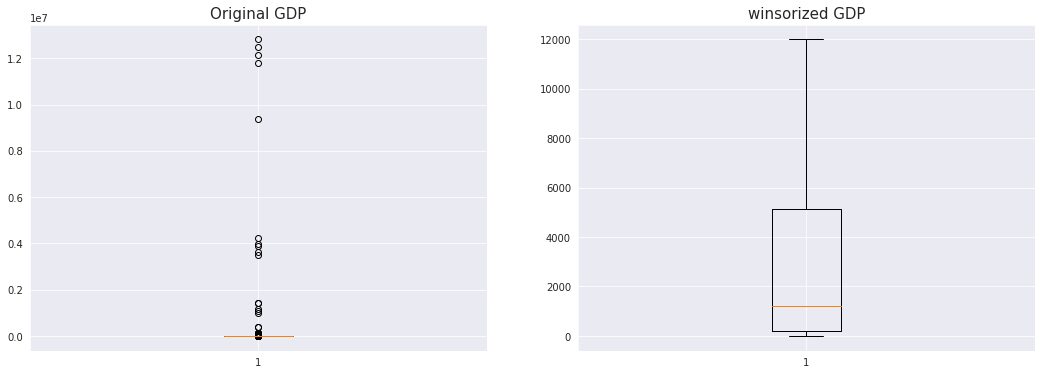

In [34]:
compere(df, 'GDP')

In [35]:
for col in col_dict.keys():
    if col in upper.keys():
        df[col] = winsorize(df[col],(0,upper[col]))
    else:
        df[col] = winsorize(df[col],(lower[col], 0))

In [36]:
df['avg_child_dr'] = (df['under-five_deaths'] + df['infant_deaths'])/2
df['avg_thinness'] = (df['thinness_1-19_years'] + df['thinness_5-9_years'])/2

df.drop(axis=1, columns=['thinness_1-19_years', 'thinness_5-9_years'], inplace=True)#, 'under-five_deaths',
                        #'infant_deaths'], inplace=True)

num_col = list(df.select_dtypes(include=['float64', 'int64']).columns)
num_col.remove('Year')
num_col.remove('Life_expectancy')

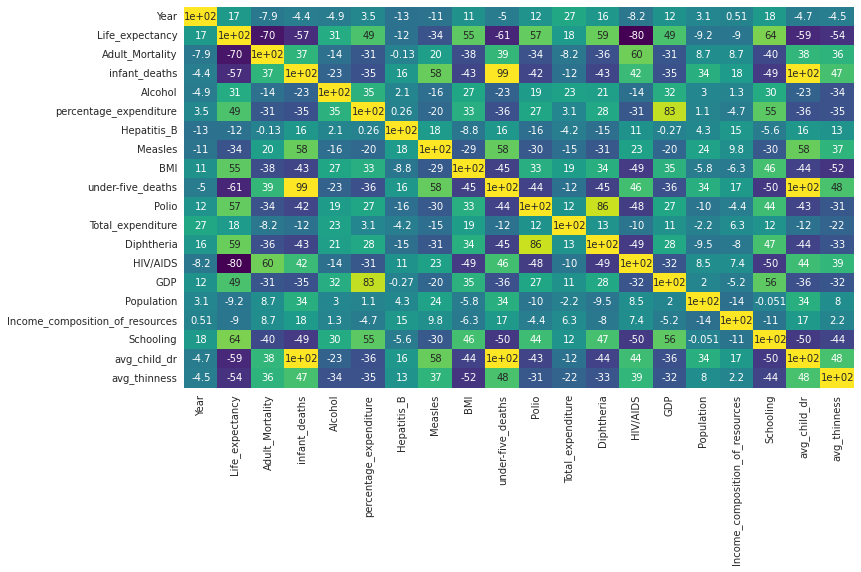

In [37]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr()*100, annot = True, cbar=False, cmap = 'viridis')

In [38]:
df = pd.get_dummies(df, drop_first=True, columns=['Status', 'continent'])
df.columns

Index(['Country', 'Year', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Income_composition_of_resources', 'Schooling', 'avg_child_dr',
       'avg_thinness', 'Status_Developing', 'continent_Americas',
       'continent_Asia', 'continent_Democratic People's Republic of Korea',
       'continent_Europe', 'continent_Oceania'],
      dtype='object')

In [73]:
dff = df.copy()

In [104]:
def train_evaluate(dff, country=None, algorithm = 'LR'):
    '''List of algorithm and their notations LR ==> LinearRegression, RFR ==> RandomForestRegressor, GBR ==> GradientBoostingRegressor'''
    from sklearn.linear_model import LinearRegression
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import AdaBoostRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.tree import DecisionTreeRegressor
    if algorithm == 'LR':
        model = LinearRegression()
    elif algorithm == 'DCR':
        model = DecisionTreeRegressor(random_state = 3)
    elif algorithm == 'RFR':
        model = RandomForestRegressor(random_state= 3)
    elif algorithm == 'ABR':
        model = AdaBoostRegressor(random_state= 3)
    elif algorithm == 'GBR':
        model = GradientBoostingRegressor(random_state= 3)
    else:
        print('algorithm must be either LR ==> LinearRegression, RFR ==> RandomForestRegressor, GBR ==> GradientBoostingRegressor')
    
    if country == None:
        pass
    else:
        dff = dff[dff['Country']==country]
    dff = dff.drop(axis=1, columns='Country Hepatitis_B Total_expenditure Population Income_composition_of_resources'.split())
    ttest = dff[dff['Year']==2015]
    train = dff.drop(ttest.index)
    X_test = ttest.drop(axis=1, columns='Life_expectancy')
    y_test = ttest['Life_expectancy']

    X_train = train.drop(axis=1, columns='Life_expectancy')
    y_train = train['Life_expectancy']
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    print(f'==================================={model.__class__.__name__}===================================')
    if algorithm == 'LR':
        coeff_dff = pd.DataFrame(model.coef_,X_train.columns,columns=['Feature Importance'])
        coeff_dff = coeff_dff.sort_values('Feature Importance', ascending=False)#.reset_index(drop=True)
    else:
        coeff_dff = pd.DataFrame(model.feature_importances_,X_train.columns,columns=['Feature Importance'])
        coeff_dff = coeff_dff.sort_values('Feature Importance', ascending=False)#.reset_index(drop=True)
    
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r_score = r2_score(y_test, pred)
    
    plt.figure(figsize=(8,6))
    sns.distplot((y_test-pred),bins=50)
    plt.title(f'{model.__class__.__name__}')
    plt.show()
    
    plt.figure(figsize=(8,6))
    plt.scatter(y_test,pred)
    plt.xlabel('orig')
    plt.ylabel('pred')
    plt.show()
    
    plt.figure(figsize=(8,6))
    sns.barplot(x='Feature Importance',
                y=coeff_dff.index,
                data=coeff_dff,
                orient="h")
    plt.show()
    #print(f'{coeff_dff} \n \n \n')
    print(f'pred_min  : {pred.min()} \npred_max : {pred.max()}')
    print(f'mean abs error : {mae} \nmean squared error : {mse} \nr2_score : {r_score}')

===================================DecisionTreeRegressor===================================


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


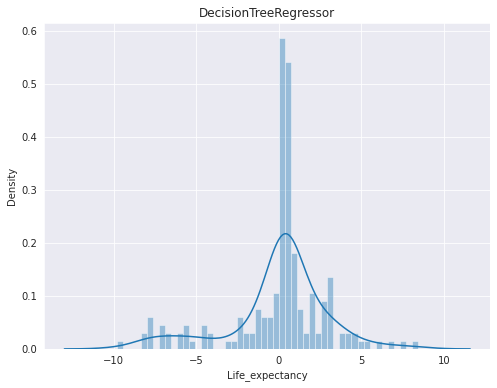

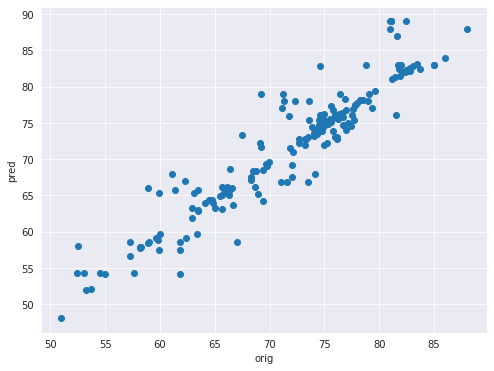

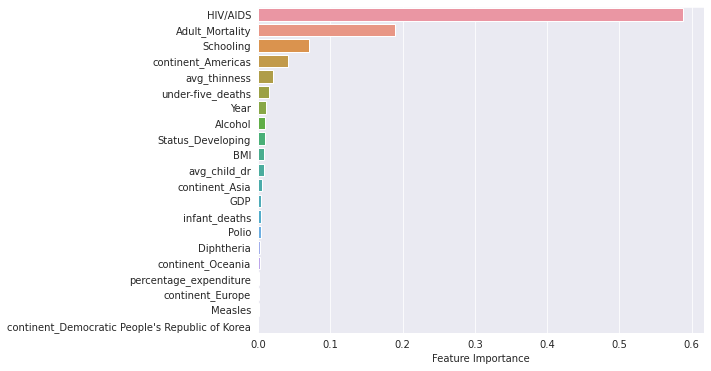

pred_min  : 48.1 
pred_max : 89.0
mean abs error : 1.9497267759562846 
mean squared error : 8.965355191256831 
r2_score : 0.8634037456138858


In [100]:
train_evaluate(dff, algorithm="DCR")

===================================LinearRegression===================================


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


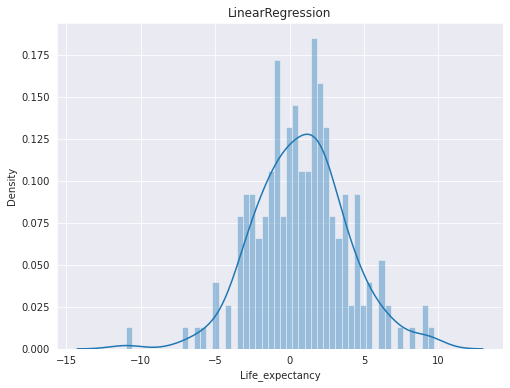

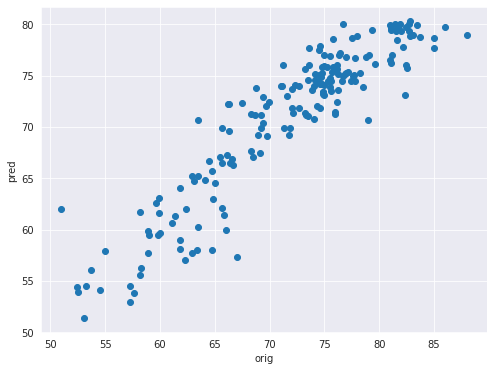

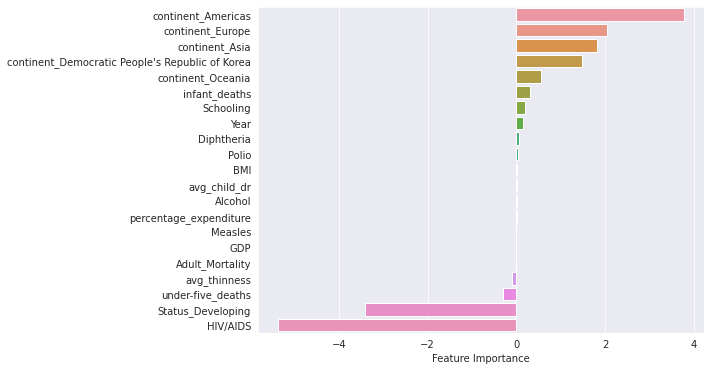

pred_min  : 51.38119622623367 
pred_max : 80.27982161904225
mean abs error : 2.490351683457024 
mean squared error : 10.30982103635411 
r2_score : 0.84291944859803


In [59]:
coeff = train_evaluate(dff)

===================================AdaBoostRegressor===================================


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


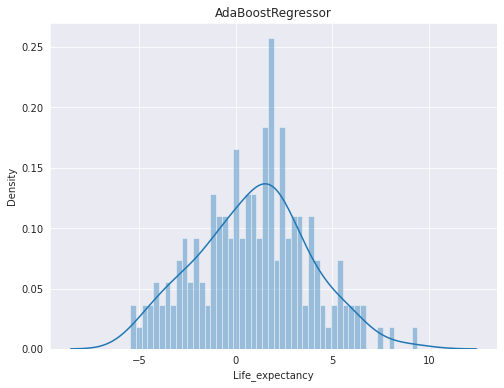

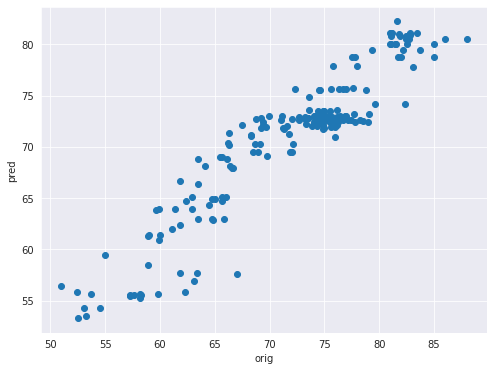

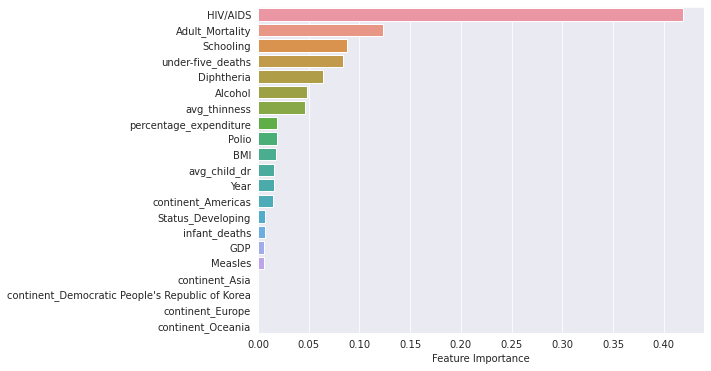

pred_min  : 53.31947565543075 
pred_max : 82.21500000000003
mean abs error : 2.4612363789019662 
mean squared error : 9.227229619412936 
r2_score : 0.8594138238269036


In [60]:
train_evaluate(dff, algorithm = 'ABR')

===================================GradientBoostingRegressor===================================


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


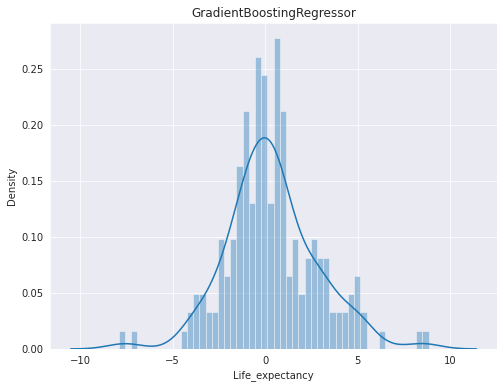

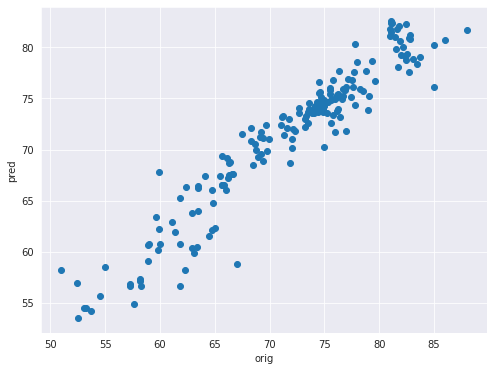

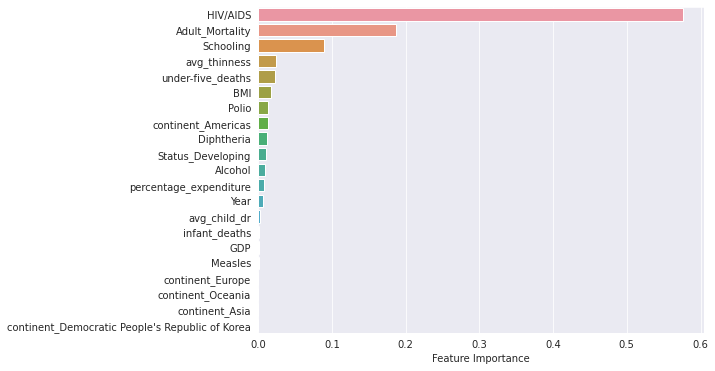

pred_min  : 53.515897663310426 
pred_max : 82.53935166387008
mean abs error : 1.8197423093598517 
mean squared error : 6.108622679337971 
r2_score : 0.9069289548874347


In [61]:
train_evaluate(dff, algorithm = 'GBR')

===================================RandomForestRegressor===================================


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


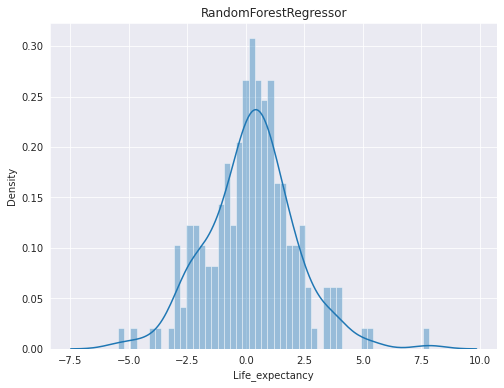

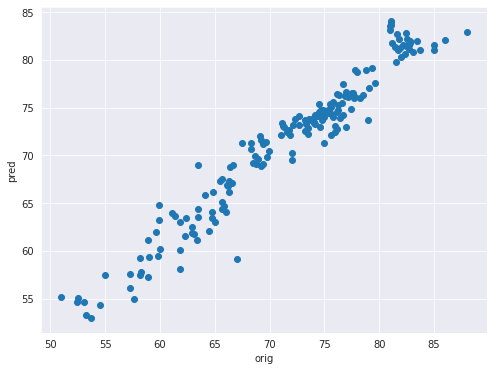

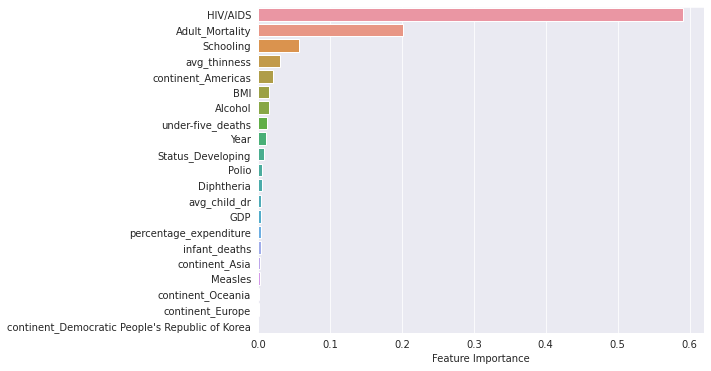

pred_min  : 52.98399999999999 
pred_max : 84.00899999999997
mean abs error : 1.4469890710382511 
mean squared error : 3.6614322568305986 
r2_score : 0.9442143761956805


In [79]:
train_evaluate(dff, algorithm = 'RFR')

In [130]:
def grid_evaluate(dff, country=None, algorithm = 'LR'):
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import AdaBoostRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.tree import DecisionTreeRegressor

    if algorithm == 'DCR':
        parameters = {"max_features":["auto","log2","sqrt"], "max_depth": [5,10,15,20,50]}
        modell = DecisionTreeRegressor(random_state = 3)
    elif algorithm == 'RFR':
        parameters = {"n_estimators" : [10,50,100,250,500],"max_depth": [5,10,15,20,30]}
        modell = RandomForestRegressor(random_state= 3)
    elif algorithm == 'ABR':
        parameters = {"learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],"n_estimators":[10, 50, 100, 200, 500]}
        modell = AdaBoostRegressor(random_state= 3)
    elif algorithm == 'GBR':
        parameters = {"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],"n_estimators":[10, 50, 100, 200],"max_depth":[5,10,15,20,30],"max_features":["log2","sqrt"],"subsample":[0.5, 0.8, 1.0]}
        modell = GradientBoostingRegressor(random_state= 3)
    else:
        print('algorithm must be either DCR ==> DecisionTreeRegression, RFR ==> RandomForestRegressor, ABR ==> AdaBoostRegressor, GBR ==> GradientBoostingRegressor')
    
    if country == None:
        pass
    else:
        dff = dff[dff['Country']==country]
    dff = dff.drop(axis=1, columns='Country Hepatitis_B Total_expenditure Population Income_composition_of_resources'.split())
    ttest = dff[dff['Year']==2015]
    train = dff.drop(ttest.index)
    X_test = ttest.drop(axis=1, columns='Life_expectancy')
    y_test = ttest['Life_expectancy']

    X_train = train.drop(axis=1, columns='Life_expectancy')
    y_train = train['Life_expectancy']
    clf = GridSearchCV(modell, parameters)
    clf.fit(X_train, y_train)
    print(clf.best_params_)
    model = clf.best_estimator_
    pred = model.predict(X_test)
    
    print(f'==================================={model.__class__.__name__}===================================')
    if algorithm == 'LR':
        coeff_dff = pd.DataFrame(model.coef_,X_train.columns,columns=['Feature Importance'])
        coeff_dff = coeff_dff.sort_values('Feature Importance', ascending=False)#.reset_index(drop=True)
    else:
        coeff_dff = pd.DataFrame(model.feature_importances_,X_train.columns,columns=['Feature Importance'])
        coeff_dff = coeff_dff.sort_values('Feature Importance', ascending=False)#.reset_index(drop=True)
    
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r_score = r2_score(y_test, pred)
    
    plt.figure(figsize=(8,6))
    sns.distplot((y_test-pred),bins=50)
    plt.title(f'{model.__class__.__name__}')
    plt.show()
    
    plt.figure(figsize=(8,6))
    plt.scatter(y_test,pred)
    plt.xlabel('orig')
    plt.ylabel('pred')
    plt.show()
    
    plt.figure(figsize=(8,6))
    sns.barplot(x='Feature Importance',
                y=coeff_dff.index,
                data=coeff_dff,
                orient="h")
    plt.show()
    #print(f'{coeff_dff} \n \n \n')
    print(f'pred_min  : {pred.min()} \npred_max : {pred.max()}')
    print(f'mean abs error : {mae} \nmean squared error : {mse} \nr2_score : {r_score}')

{'max_depth': 5, 'max_features': 'auto'}
===================================DecisionTreeRegressor===================================


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


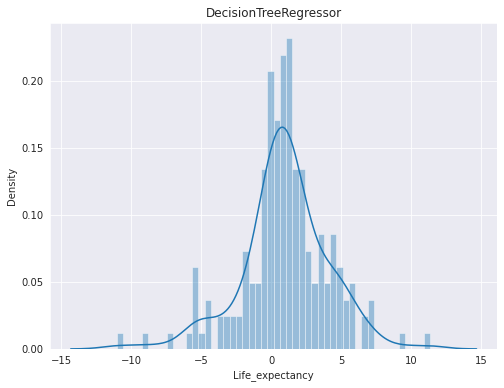

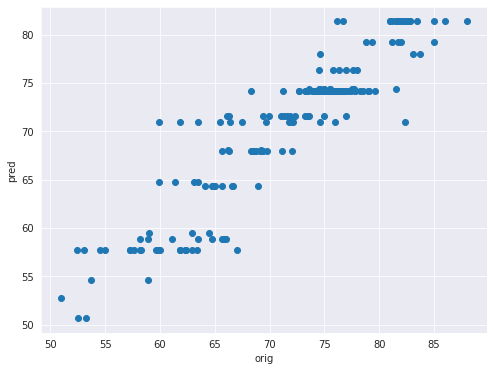

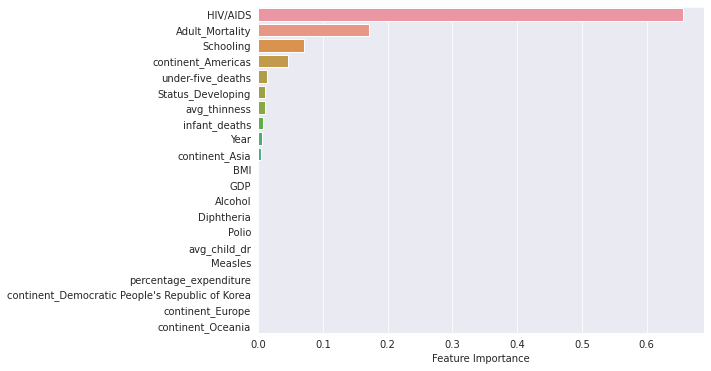

pred_min  : 50.687058823529405 
pred_max : 81.35465838509316
mean abs error : 2.389472339774303 
mean squared error : 10.576340589618269 
r2_score : 0.8388587536316947


In [120]:
grid_evaluate(dff, algorithm="DCR")

{'max_depth': 20, 'n_estimators': 100}
===================================RandomForestRegressor===================================


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


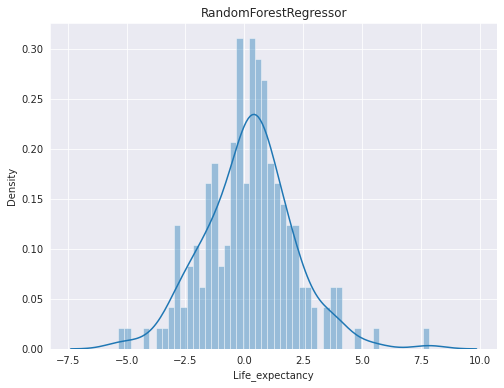

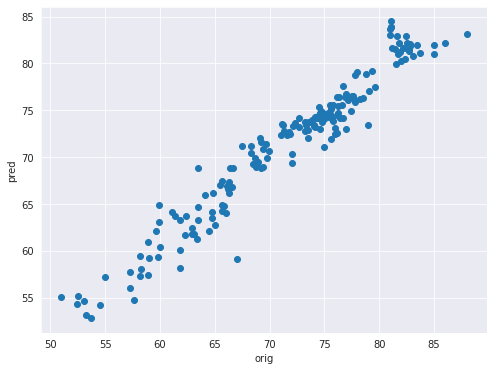

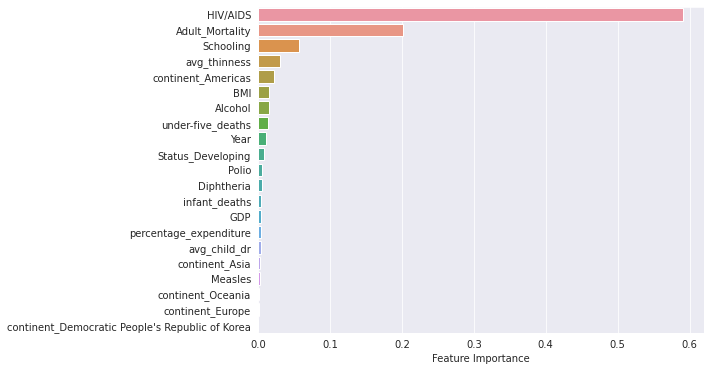

pred_min  : 52.84400000000002 
pred_max : 84.48100000000001
mean abs error : 1.4505808717794864 
mean squared error : 3.6559730141562614 
r2_score : 0.9442975532795986


In [124]:
grid_evaluate(dff, algorithm="RFR")

{'learning_rate': 0.1, 'n_estimators': 200}
===================================AdaBoostRegressor===================================


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


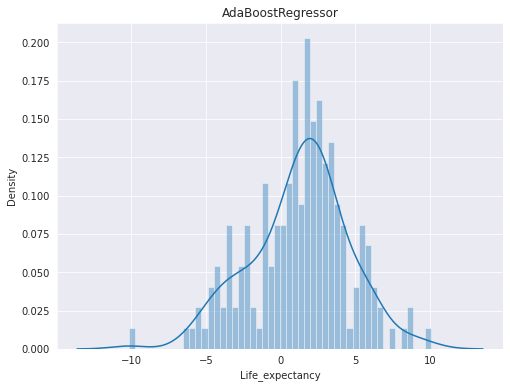

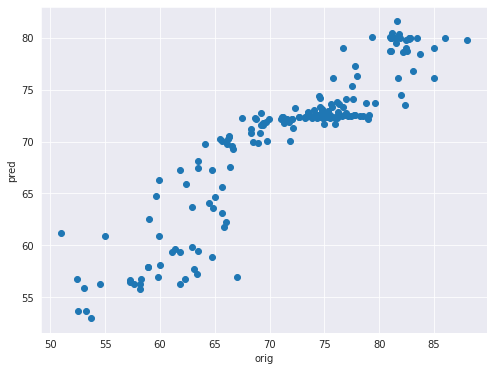

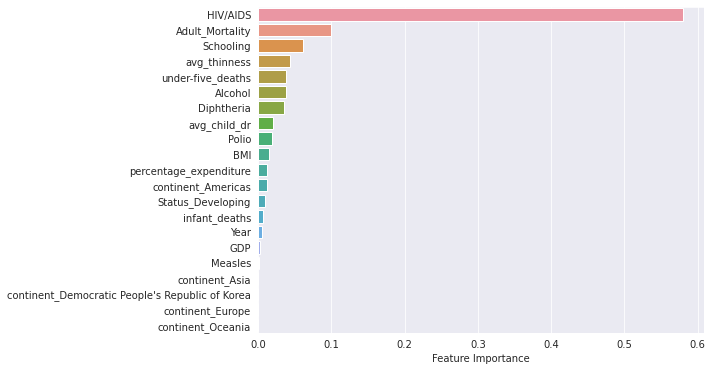

pred_min  : 52.98909612625532 
pred_max : 81.5766393442623
mean abs error : 2.869912787046657 
mean squared error : 12.282625960324761 
r2_score : 0.8128617701792571


In [129]:
grid_evaluate(dff, algorithm="ABR")

{'learning_rate': 0.075, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200, 'subsample': 1.0}
===================================GradientBoostingRegressor===================================


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


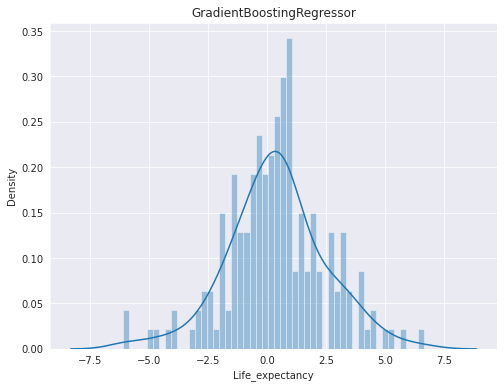

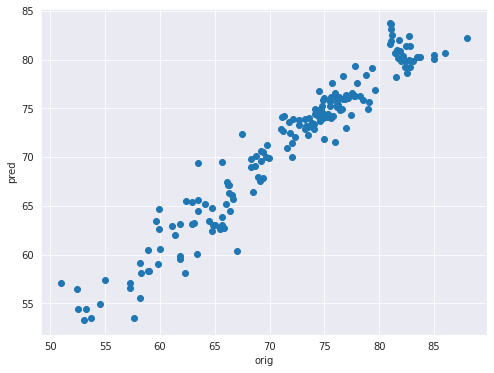

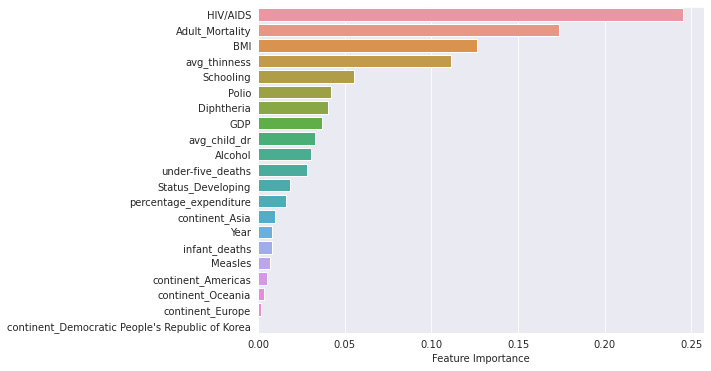

pred_min  : 53.29780697768251 
pred_max : 83.69913471453293
mean abs error : 1.597068912228821 
mean squared error : 4.479584361561364 
r2_score : 0.9317490013566194


In [131]:
grid_evaluate(dff, algorithm="GBR")